In [1]:
# filter some warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
from myfunctions import *

In [3]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cmocean
import colorsys

from adjustText import adjust_text

In [4]:
name = 'GFDL-CM4'
data_siconc = openpickle(name, '../../SO_data/data_siconc_w_area/')
data_sithick = openpickle(name, '../../SO_data/data_thick/')
data_mld = openpickle(name, '../../SO_data/data_mld/')

In [33]:
var_names = ['carea', 'parea', 'sic', 'mld', 'thick', 'hfds', 'sst', 'sss', 'sann', 'tann']
mycols = ['name', 'p_cross', 'c_cross']
var_dict = {}
for v1 in range(0, len(var_names)):
    for v2 in range(0, len(var_names)):
        if v1 < v2:
            newcolname1 = var_names[v1] + '_vs_' + var_names[v2] + '_c'
            newcolname2 = var_names[v1] + '_vs_' + var_names[v2] + '_p'
            var_dict[newcolname1] = [var_names[v1], var_names[v2], 'c']
            var_dict[newcolname2] = [var_names[v1], var_names[v2], 'p']
mycols.extend(list(var_dict.keys()))
mycols

['name',
 'p_cross',
 'c_cross',
 'carea_vs_parea_c',
 'carea_vs_parea_p',
 'carea_vs_sic_c',
 'carea_vs_sic_p',
 'carea_vs_mld_c',
 'carea_vs_mld_p',
 'carea_vs_thick_c',
 'carea_vs_thick_p',
 'carea_vs_hfds_c',
 'carea_vs_hfds_p',
 'carea_vs_sst_c',
 'carea_vs_sst_p',
 'carea_vs_sss_c',
 'carea_vs_sss_p',
 'carea_vs_sann_c',
 'carea_vs_sann_p',
 'carea_vs_tann_c',
 'carea_vs_tann_p',
 'parea_vs_sic_c',
 'parea_vs_sic_p',
 'parea_vs_mld_c',
 'parea_vs_mld_p',
 'parea_vs_thick_c',
 'parea_vs_thick_p',
 'parea_vs_hfds_c',
 'parea_vs_hfds_p',
 'parea_vs_sst_c',
 'parea_vs_sst_p',
 'parea_vs_sss_c',
 'parea_vs_sss_p',
 'parea_vs_sann_c',
 'parea_vs_sann_p',
 'parea_vs_tann_c',
 'parea_vs_tann_p',
 'sic_vs_mld_c',
 'sic_vs_mld_p',
 'sic_vs_thick_c',
 'sic_vs_thick_p',
 'sic_vs_hfds_c',
 'sic_vs_hfds_p',
 'sic_vs_sst_c',
 'sic_vs_sst_p',
 'sic_vs_sss_c',
 'sic_vs_sss_p',
 'sic_vs_sann_c',
 'sic_vs_sann_p',
 'sic_vs_tann_c',
 'sic_vs_tann_p',
 'mld_vs_thick_c',
 'mld_vs_thick_p',
 'mld_vs_hf

In [38]:
t = pd.DataFrame(columns=mycols)
t['name'] = ['a', 'b', 'c']

In [39]:
t

,name,p_cross,c_cross,carea_vs_parea_c,carea_vs_parea_p,carea_vs_sic_c,carea_vs_sic_p,carea_vs_mld_c,carea_vs_mld_p,carea_vs_thick_c,...,sst_vs_sann_c,sst_vs_sann_p,sst_vs_tann_c,sst_vs_tann_p,sss_vs_sann_c,sss_vs_sann_p,sss_vs_tann_c,sss_vs_tann_p,sann_vs_tann_c,sann_vs_tann_p
0,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
t.iloc[1, 1:3] = [1, 2]
t

,name,p_cross,c_cross,carea_vs_parea_c,carea_vs_parea_p,carea_vs_sic_c,carea_vs_sic_p,carea_vs_mld_c,carea_vs_mld_p,carea_vs_thick_c,...,sst_vs_sann_c,sst_vs_sann_p,sst_vs_tann_c,sst_vs_tann_p,sss_vs_sann_c,sss_vs_sann_p,sss_vs_tann_c,sss_vs_tann_p,sann_vs_tann_c,sann_vs_tann_p
0,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
mld1000 = xr.where(data_mld.mld.where(data_mld.mld>=1000).mean('time')>0,1,np.nan)
mld2000 = xr.where(data_mld.mld.where(data_mld.mld>=2000).mean('time')>0,1,np.nan)
                   
mldstd = data_mld.mld.std("time")

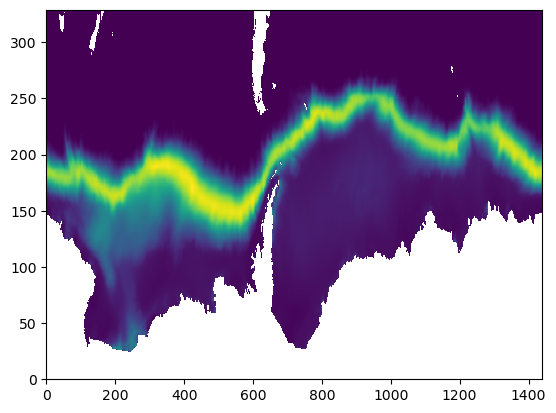

In [7]:
plt.pcolormesh(data_siconc.siconc.std("time"))

In [10]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [11]:
def modify_map(ax):
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=1, color = (0.88,0.88,0.88))
    ax.add_feature(cfeature.COASTLINE, linewidth = 0.5)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.spines['geo'].set_linewidth(0.5)
    ax.gridlines(draw_labels=False, 
                 ylocs=np.linspace(-90, 90, 7), 
                 color = 'grey', linestyle = '-.', linewidth = 0.5, alpha = 0.8)


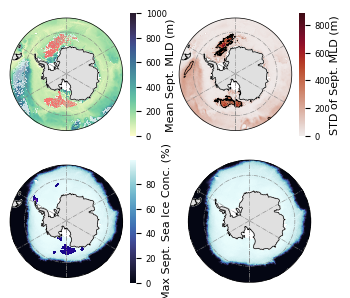

In [29]:
fig = plt.figure(figsize=(4, 3.5))

ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.SouthPolarStereo())
plt.subplots_adjust(wspace=0.2, hspace=0.2)

mldavg = data_mld.mld.mean('time')
im1 = ax1.pcolormesh(data_mld.newlon, data_mld.newlat, mldavg, 
                  transform=ccrs.PlateCarree(), cmap=cmocean.cm.deep)
im1.set_clim(0, 1000)
cbar1 = plt.colorbar(im1, ax=ax1, label='meters', pad=0.05)
cbar1.set_label('Mean Sept. MLD (m)', size=8, labelpad=-0.1)
cbar1.ax.tick_params(labelsize=6)
cbar1.outline.set_visible(False)

# mld1000 = xr.where(data_mld.where(data_mld.mld>=1000).mean('time')>0, 1, 0)
ax1.pcolormesh(data_mld.newlon, data_mld.newlat, mld1000,
               transform=ccrs.PlateCarree(), cmap=mcolors.ListedColormap(['r']), alpha=0.5)

ax1.pcolormesh(data_mld.newlon, data_mld.newlat, mld2000,
               transform=ccrs.PlateCarree(), cmap=mcolors.ListedColormap(['r']), alpha=0.3)
modify_map(ax1)


ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.SouthPolarStereo())
plt.subplots_adjust(wspace=0.2, hspace=0.2)
im2 = ax2.pcolormesh(data_mld.newlon, data_mld.newlat, mldstd, 
                     transform=ccrs.PlateCarree(), cmap=cmocean.cm.amp)
cbar2 = plt.colorbar(im2, ax=ax2, label='meters', pad=0.05)
cbar2.set_label('STD of Sept. MLD (m)', size=8, labelpad=-0.1)
cbar2.ax.tick_params(labelsize=6)
cbar2.outline.set_visible(False)
mldzscore = (mldstd - mldstd.mean())/mldstd.std()
ax2.contour(data_mld.newlon, data_mld.newlat, mldzscore, 
            transform=ccrs.PlateCarree(),
            levels=[2], colors='k', linewidths=0.5)
modify_map(ax2)

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.SouthPolarStereo())
plt.subplots_adjust(wspace=0.2, hspace=0.2)
siconcmax = data_siconc.siconc.max('time')
im3 = ax3.pcolormesh(data_siconc.newlon, data_siconc.newlat, siconcmax,
                     transform=ccrs.PlateCarree(), cmap=cmocean.cm.ice)

cbar3 = plt.colorbar(im3, ax=ax3, label='fraction', pad=0.05)
cbar3.set_label('Max Sept. Sea Ice Conc. (%)', size=8)
cbar3.ax.tick_params(labelsize=6)
cbar3.outline.set_visible(False)
ax3.contourf(data_siconc.newlon, data_siconc.newlat, data_polynya.count('time').where(data_polynya.count('time')>0)/len(data_polynya.time),
            transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin = 0, vmax=0.05)
modify_map(ax3)


ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.SouthPolarStereo())
plt.subplots_adjust(wspace=0.2, hspace=0.2)
ax4.pcolormesh(data_sithick.newlon, data_sithick.newlat, siconcmax,
                     transform=ccrs.PlateCarree(), cmap=cmocean.cm.ice)

# cbar4 = plt.colorbar(im4, ax=ax4, label='meters', pad=0.05)
# cbar4.set_label('Max Sept. Sea Ice Thickness (m)', size=8)
# cbar4.ax.tick_params(labelsize=6)
# cbar4.outline.set_visible(False)
modify_map(ax4)
                  # vmin = 0, vmax=0.2, 
        #                    transform=ccrs.PlateCarree(), cmap=plt.cm.plasma)


# fig.savefig('DeepConvection_Multi.png', dpi = 300)
# fig.savefig('DeepConvection_Multi.eps', format='eps')  # too big (should be less than 5MB
# fig.savefig('DeepConvection_Multi.pdf', format='pdf')  # too big (should be less than 5MB